In [1]:
#pip install factor_analyzer

In [94]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

## Load Data

In [95]:
df= pd.read_csv("/Users/Caspar/Documents/Unstructured Anlaytics/bfi.csv")

In [96]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Preprocess Data

In [97]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [98]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [99]:
# Dropping missing values rows
df.dropna(inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

In [101]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


### Bartlett’s Test - Test the hypothesis that the correlation matrix is equal to the identity matrix.identiy

In [102]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18210.199553924962, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix. 

Identity Matrix 

In [103]:
np.identity(6)   

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

### Kaiser-Meyer-Olkin (KMO) - estimates the proportion of variance among all the observed variable

In [104]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [105]:
kmo_model

0.8482210116350438

The overall KMO for our data is 0.84. This value indicates that we have 84% of variance across variables

### Choosing the Number of Factors

In [106]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
method='minres', n_factors=25, rotation='promax', rotation_kwargs={},  # allow factors to be coorelated 
use_smc=True)

FactorAnalyzer(n_factors=25, rotation_kwargs={})

In [107]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# ONLY SIX-factors eigenvalues are greater than 1, so we should choose six factors

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

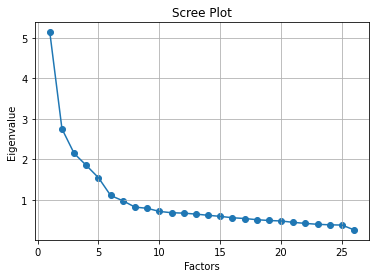

In [108]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Number eigenvalues greater than one considered as the number of factors. Thus, we will use six factors

In [109]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(6, rotation="promax")

fa.fit(df)

FactorAnalyzer(n_factors=6, rotation_kwargs={})

In [110]:
fa.loadings_

array([[-0.04720458, -0.03266088,  0.03052301, -0.04813312,  0.00792762,
         0.12626208],
       [ 0.10014322,  0.17485133,  0.03578126, -0.60863185,  0.15131607,
         0.24774649],
       [ 0.07515944,  0.15198417,  0.09142952,  0.65140066, -0.03227099,
        -0.20274429],
       [ 0.00892382,  0.34046355,  0.01501439,  0.53859699,  0.03724553,
        -0.04141317],
       [-0.04735087,  0.18490047,  0.18355745,  0.35291199,  0.18054053,
         0.01047462],
       [-0.15046498,  0.45606984, -0.04512758,  0.36599917,  0.05497271,
         0.07101373],
       [ 0.06820742,  0.04891683,  0.53885398, -0.05159892, -0.12564976,
         0.18119784],
       [ 0.15456871,  0.0141329 ,  0.67162294, -0.00586568, -0.00281699,
         0.25084937],
       [ 0.04483607, -0.04888868,  0.57308729,  0.07259215,  0.05514908,
         0.09065851],
       [ 0.08205015,  0.16357226, -0.71830379, -0.10720605,  0.15560447,
         0.18285037],
       [ 0.18443671, -0.04412133, -0.55742837, -0.

In [111]:
pd.DataFrame(fa.loadings_)

,0,1,2,3,4,5
0,-0.047205,-0.032661,0.030523,-0.048133,0.007928,0.126262
1,0.100143,0.174851,0.035781,-0.608632,0.151316,0.247746
2,0.075159,0.151984,0.091430,0.651401,-0.032271,-0.202744
3,0.008924,0.340464,0.015014,0.538597,0.037246,-0.041413
4,-0.047351,0.184900,0.183557,0.352912,0.180541,0.010475
5,-0.150465,0.456070,-0.045128,0.365999,0.054973,0.071014
6,0.068207,0.048917,0.538854,-0.051599,-0.125650,0.181198
7,0.154569,0.014133,0.671623,-0.005866,-0.002817,0.250849
8,0.044836,-0.048889,0.573087,0.072592,0.055149,0.090659
9,0.082050,0.163572,-0.718304,-0.107206,0.155604,0.182850


Factor 6 has none of the high loagings for any variable and is not easily interpretable. Let's try five factors

In [112]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(5, rotation="promax")

fa.fit(df)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [113]:
pd.DataFrame(fa.loadings_)

,0,1,2,3,4
0,-0.020976,-0.069857,0.042375,-0.011138,0.014111
1,0.143203,0.112572,0.076393,-0.464637,-0.052952
2,0.042654,0.120662,0.083889,0.603929,-0.000917
3,0.025300,0.231535,0.040305,0.609078,-0.004269
4,-0.031293,0.119068,0.209687,0.405282,-0.173323
5,-0.103004,0.321401,0.001468,0.476897,0.021189
6,0.092936,-0.026823,0.566877,-0.019521,0.148978
7,0.187393,-0.083637,0.699881,0.049944,0.033406
8,0.050647,-0.082081,0.595889,0.074420,-0.077749
9,0.151163,0.059859,-0.641997,0.016241,-0.039933


In [114]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.74008049, 2.32414295, 2.07201266, 1.6048143 , 1.48964466]),
 array([0.10538771, 0.08939011, 0.07969279, 0.06172363, 0.05729403]),
 array([0.10538771, 0.19477782, 0.27447062, 0.33619425, 0.39348827]))

In [115]:
pd.DataFrame(fa.get_factor_variance())

,0,1,2,3,4
0,2.740080,2.324143,2.072013,1.604814,1.489645
1,0.105388,0.089390,0.079693,0.061724,0.057294
2,0.105388,0.194778,0.274471,0.336194,0.393488


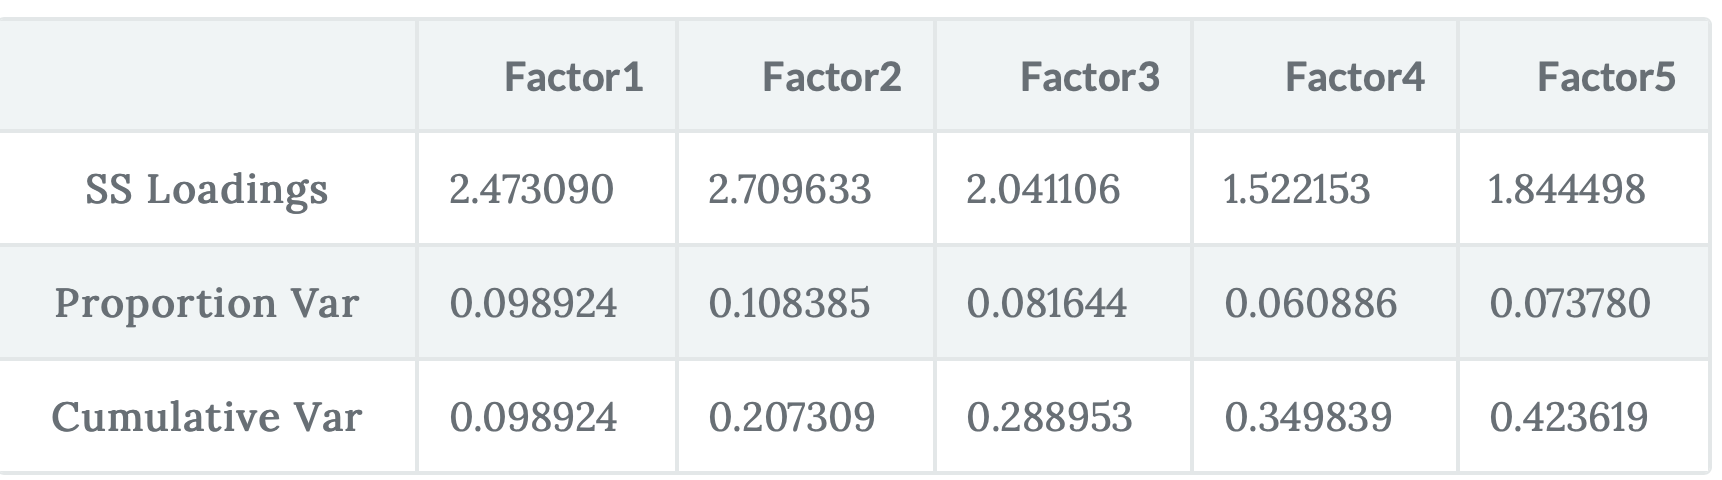

In [116]:
factorScores = fa.transform(df)

In [117]:
factorScoresDF = pd.DataFrame(data = factorScores,
  columns = ['fa1', 'fa2', 'fa3', 'fa4', 'fa5']) # Moving those from an array to a pandas data frame for pd.concat

In [118]:
factorScoresDF     

,fa1,fa2,fa3,fa4,fa5
0,-0.150652,-0.312064,-1.345421,-1.688425,-0.892079
1,0.442151,0.105679,-0.557113,-0.302439,-0.162918
2,0.127896,0.491285,-0.067094,0.179859,-0.652147
3,-0.033138,-0.085889,-1.062196,-1.140369,-0.089504
4,0.248445,-0.359116,-0.113239,-0.721057,-0.804265
...,...,...,...,...,...
2431,-1.491696,1.409848,-0.547618,0.295026,-1.254912
2432,0.050878,0.776246,-0.528343,0.966397,-0.234153
2433,0.587955,-0.374192,0.928653,1.006077,-0.809467
2434,0.196347,0.833240,-0.059489,0.634415,-1.919472
